Implementation of Polynomial Regression Model (Lasso  and Ridge regression)

In [21]:
import numpy as np#Used for numerical operations
import matplotlib.pyplot as plt  #To visualize the results.
from sklearn.preprocessing import PolynomialFeatures# To generate polynomial features from the input data.
from sklearn.linear_model import Ridge, Lasso# The two regularization methods.
from sklearn.model_selection import train_test_split # To split the dataset into training and test sets.
from sklearn.metrics import mean_squared_error  # To evaluate the model's performance

generate a dataset

In [15]:
np.random.seed(0)  # To ensure reproducibility
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X - 2 * (X ** 2) + np.random.normal(-3, 3, 100)
X = X[:, np.newaxis]  # Reshaping to make it a 2D array
X

array([[-3.29215704],
       [ 0.79952837],
       [-0.93621395],
       [-4.7226796 ],
       [-3.60267397],
       [ 4.93183364],
       [-0.85026525],
       [ 2.45407162],
       [ 2.30965656],
       [ 0.76820449],
       [ 1.56786929],
       [-2.36282052],
       [-0.28311318],
       [ 1.63497495],
       [ 0.6684103 ],
       [ 0.99897702],
       [-2.48223722],
       [ 2.61547479],
       [ 1.0607969 ],
       [ 4.56228722],
       [ 9.65896945],
       [ 0.03914421],
       [-0.5933086 ],
       [ 4.22649506],
       [-4.80926387],
       [ 6.36309702],
       [ 1.86272445],
       [ 2.56155155],
       [-2.59833764],
       [-2.40807631],
       [ 1.53515772],
       [ 0.86551244],
       [ 4.66335724],
       [ 7.9423894 ],
       [ 3.04373645],
       [ 1.53095309],
       [-1.69087204],
       [-1.60713955],
       [ 3.16198045],
       [ 2.90690825],
       [ 5.1456589 ],
       [ 6.26005381],
       [ 7.11881057],
       [-3.85232619],
       [ 3.52895655],
       [ 3

Tarining and tasting data 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
print(X_test)
print("____")
print(X_train)

[[ 1.86272445]
 [-1.53633871]
 [-0.93621395]
 [ 0.71500439]
 [ 4.05443027]
 [-0.92991711]
 [-2.48223722]
 [ 5.70447746]
 [ 2.08454669]
 [-0.1197195 ]
 [ 5.54189655]
 [ 1.37517507]
 [ 2.9346576 ]
 [ 1.63497495]
 [ 2.45407162]
 [ 1.53515772]
 [-0.5933086 ]
 [-4.80926387]
 [ 7.9423894 ]
 [ 2.30965656]]
____
[[-3.85232619]
 [ 4.43943885]
 [-4.7226796 ]
 [ 1.61305127]
 [ 3.3142229 ]
 [ 6.84169354]
 [-0.85026525]
 [ 0.79403191]
 [ 0.60301268]
 [ 4.61239145]
 [ 4.01738134]
 [ 5.49544952]
 [ 3.20953084]
 [ 4.72189509]
 [ 0.83929251]
 [ 2.56155155]
 [ 1.0607969 ]
 [ 1.80044833]
 [ 7.17884781]
 [ 0.79297508]
 [ 0.79952837]
 [ 3.07865948]
 [ 7.11881057]
 [ 6.26005381]
 [-3.60267397]
 [ 0.99897702]
 [ 2.61547479]
 [ 5.1456589 ]
 [ 3.16198045]
 [ 4.93183364]
 [-1.66733521]
 [ 3.0882235 ]
 [-3.29215704]
 [ 3.04373645]
 [-2.59833764]
 [ 4.68639968]
 [-2.36282052]
 [ 1.53095309]
 [ 4.22649506]
 [ 3.53241541]
 [ 1.56786929]
 [ 0.86551244]
 [ 6.89059504]
 [ 1.09258431]
 [ 1.83150397]
 [-3.68766753]
 [ 4

transform to 3rd degree polynomail

In [31]:
poly = PolynomialFeatures(degree = 3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

Ridge regression

In [33]:
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train_poly, y_train)
ridge_predict = ridge.predict(X_test_poly)
mse_ridge = mean_squared_error(y_test, ridge_predict)
print(f"Ridge Regression MSE: {mse_ridge}")


Ridge Regression MSE: 8.734480570726797


Lasso Regression

In [34]:
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train_poly, y_train)
lasso_predict = lasso.predict(X_test_poly)
mse_lasso = mean_squared_error(y_test, lasso_predict)
print(f"Lasso Regression MSE: {mse_lasso}")

Lasso Regression MSE: 8.802875124432346


 Plot the results


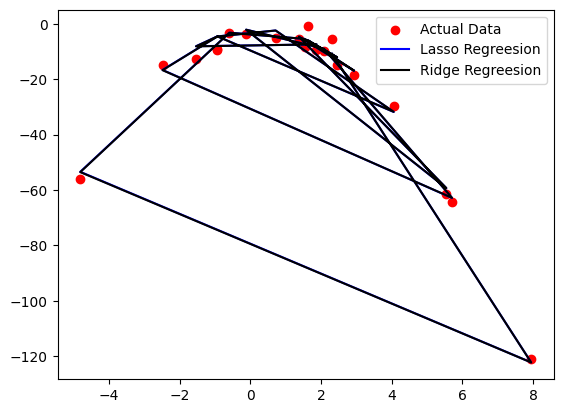

In [42]:
plt.scatter(X_test, y_test, color = 'red', label = 'Actual Data')
plt.plot(X_test, lasso_predict, color = 'blue', label = 'Lasso Regreesion')
plt.plot(X_test, ridge_predict, color = 'black', label = 'Ridge Regreesion')
plt.legend()
plt.show()